# Importing Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import r2_score


# Read and Explore Data


In [2]:
Data_points = np.genfromtxt("MultipleLR.csv" ,  delimiter= ',')
X_Data = Data_points[:,0:3]
Y_Data = Data_points[:,1]

# plt.scatter(X_Data , Y_Data)
# plt.show()



In [3]:
feature_length = X_Data.shape[1]

In [4]:
feture = np.concatenate((np.ones(len(X_Data)).reshape( len(X_Data), 1) 
                         , X_Data.reshape(len(X_Data) , feature_length))  , axis = 1)



In [5]:
feture.shape

(25, 4)

# Generate Batches

In [6]:
def Generate_Batches(Data  , batch_size):
    Batches = []
    M = 0
    while(M+batch_size <= len(Data)):
        Batches.append(Data[M : M+batch_size])
        M +=batch_size-1
    Batches.append(Data[M : ]) 
    return Batches



# Mini-Batch GD

In [62]:
def Mini_Batch_GD(X_Data , Y_Data  , alpha , Max_no_iter , Batch_Size , stoping_therthold):
    feature_length = X_Data.shape[1]
    theta = np.zeros(feature_length+1).reshape(1,feature_length+1)
    # print(theta[0].shape)
    alpha = alpha
    Data_length = len(X_Data)
    Epoch = 100

    Not_first_iter =0

    Jtheta = []
    theta_zero = []
    theta_one = []
    theta_two = []
    theta_three = []

    Max_no_iter = Max_no_iter
    Batch_Size = Batch_Size
    
    feture_Mini = Generate_Batches(feture , Batch_Size)
    Y_mini = Generate_Batches(Y_Data , Batch_Size)

    # print(theta.T.shape , feture_Mini[0].T.shape)
    for j in range(Max_no_iter):

        for i in range(len(feture_Mini)):
    #         print(theta , feture_Mini[i].T)
    #         print(theta.T.shape , feture_Mini[i].T.shape)
            Y= np.dot(theta ,feture_Mini[i].T)
    #         print(theta.T.shape , feture_Mini[i].T.shape)
    #         print()
    #         print(Y.shape)
            Error_mini = Y-Y_mini[i]
    #         print(Error_mini.shape)
            if (Not_first_iter >len(feture_Mini) and np.abs(Jtheta[-1]-Jtheta[-1*(len(feture_Mini)+1)]) < stoping_therthold):
                break
            Not_first_iter +=1
    #         print(theta[0])
            theta_zero.append(theta[0][0])
            theta_one.append(theta[0][1])
            theta_two.append(theta[0][2])
            theta_three.append(theta[0][3])

            Jtheta.append(((1/2*len(feture_Mini))*(np.dot(Error_mini ,Error_mini.T)))[0])
    #         print(Jtheta)
    #         print(Jtheta[-1].shape)
    #         print(len(Jtheta))
    #         print(Error_mini.shape , feture_Mini[i].shape)
            Gradt_mini = np.dot( Error_mini , feture_Mini[i])
    #         print(Gradt_mini.shape)
            theta = theta - (alpha/len(feture_Mini))*Gradt_mini
    #         print(theta.shape)
    #         print("end \n")

    return theta[0] , theta_zero , theta_one , theta_two , theta_three , Jtheta 



In [63]:
theta , theta_zero , theta_one , theta_three, theta_four , Jtheta = Mini_Batch_GD(X_Data , Y_Data  , 0.00001 , 1000 , 5 , 5)

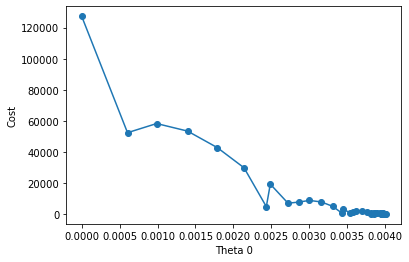

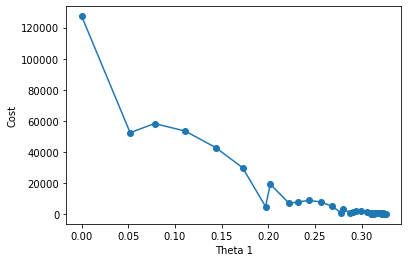

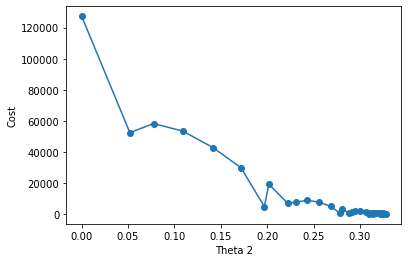

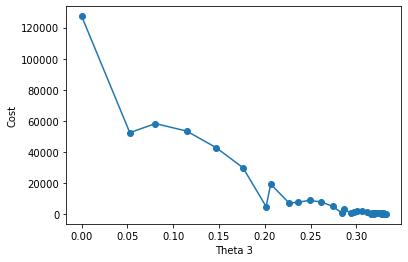

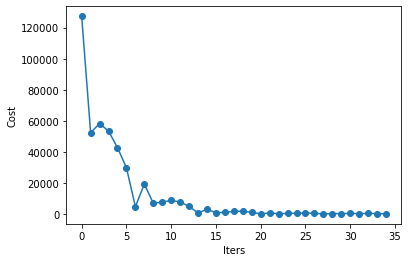

In [64]:
plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_three , Jtheta , '-o')
plt.xlabel("Theta 2")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_four , Jtheta , '-o')
plt.xlabel("Theta 3")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# Adam Algorithm use MiniBatch

In [59]:
def Adam_MiniBatch(X_Data , Y_Data  , alpha , Max_no_iter , Batch_Size , stoping_therthold , epslon , Beta_1 , Beta_2):
    feature_length = X_Data.shape[1]
    theta = np.zeros(feature_length+1).reshape(1,feature_length+1)
    alpha = alpha

    Epoch = 100

    Not_first_iter = 0
    Jtheta = []
    theta_zero = []
    theta_one = []

    Max_no_iter = Max_no_iter

    Mt = 0
    Vt = 0
    Mt_hat = 0
    Vt_hat = 0
    epslon = epslon
    Beta_1 = Beta_1
    Beta_2 = Beta_2

    Batch_Size = Batch_Size
    feture_Mini = Generate_Batches(feture , Batch_Size)
    Y_mini = Generate_Batches(Y_Data , Batch_Size)

    Data_length = len(feture_Mini)
    for i in range(Max_no_iter):
        for i in range(len(feture_Mini)):
            Y= np.dot(theta ,feture_Mini[i].T)
            Error = Y - Y_mini[i]

            if (Not_first_iter >len(feture_Mini) and np.abs(Jtheta[-1]-Jtheta[-1*(len(feture_Mini)+1)]) < stoping_therthold):
                break
            Not_first_iter +=1
            theta_zero.append(theta[0][0])
            theta_one.append(theta[0][1])
            Jtheta.append((1/2)*(np.dot( Error , Error.T)[0][0]/Data_length))

            Gradt = (np.dot( Error , feture_Mini[i]) /Data_length)


            Mt = Beta_1*Mt + (1-Beta_1)*Gradt
            Vt = Beta_2*Vt + (1-Beta_2)*np.square(Gradt)
            Mt_hat = Mt/(1-Beta_1)
            Vt_hat = Vt/(1-Beta_2)
            theta = theta - (alpha/np.sqrt(Vt_hat+epslon))*Mt_hat


    print(theta[0]) 

[0.34430569 0.3292146  0.33178482 0.33100822]


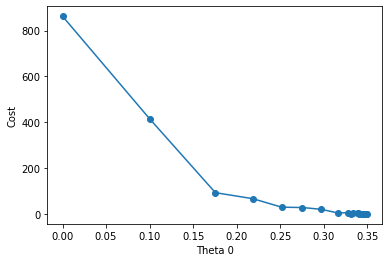

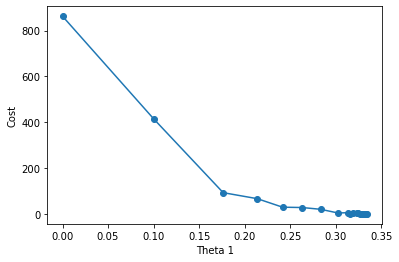

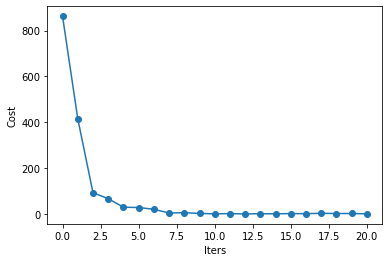

In [61]:
plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()